# Amazon Best Selling Book From 2009 to 2019

Amazon is an American multinational technology company focusing on e-commerce, cloud computing, online advertising, digital streaming, and artificial intelligence. It has been often referred to as "one of the most influential economic and cultural forces in the world, and is often regarded as one of the world's most valuable brands. It is considered one of the Big Five American technology companies, alongside Alphabet (parent company of Google), Apple, Meta (formerly Facebook, Inc.) and Microsoft.

Amazon was founded by Jeff Bezos from his garage in Bellevue, Washington, on July 5, 1994. Initially an online marketplace for books, it has expanded into a multitude of product categories, a strategy that has earned it the moniker The Everything Store. It has multiple subsidiaries including Amazon Web Services (cloud computing), Zoox (autonomous vehicles), Kuiper Systems (satellite Internet), and Amazon Lab126 (computer hardware R&D). Its other subsidiaries include Ring, Twitch, IMDb, and Whole Foods Market. Its acquisition of Whole Foods in August 2017 for US$13.4 billion substantially increased its footprint as a physical retailer.

## Aim of Project

The Aim of this project is to unravel what type of books were bought frequently, between 2009 and 2019

Inline with the project aim i will be getting the following insights

- Top 10 Authors (Best selling authors)


- Top 10 best selling Book from 2009 to 2019


- Top 10 Authors with the Highest Reviews


- Top 10 Authos and Book with the Highest Reviews


- Number of books by cover type


- Book by Top Average price


- Top rated Books from 2009 to 2019


- Top rated books along side their authors


- Relationship between rating and price

In [208]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline


import requests
from selenium import webdriver
from bs4 import BeautifulSoup
from urllib.request import urlopen
from time import sleep


import warnings
warnings.filterwarnings('ignore')

Gathering the Data
Let's get the urls and the second page for each year beginning from 2009 to 2019

In [209]:

urls =[]
years = [str(i) for i in range(2009,2019)] #list of years between 2009-2019
for year in years:
    urls.append (f"https://www.amazon.com/gp/bestsellers/{year}/books")
    urls.append(f"https://www.amazon.com/gp/bestsellers/{year}/books/ref=zg_bsar_pg_2/ref=zg_bsar_pg_2?ie=UTF8&pg=2")
    
urls

['https://www.amazon.com/gp/bestsellers/2009/books',
 'https://www.amazon.com/gp/bestsellers/2009/books/ref=zg_bsar_pg_2/ref=zg_bsar_pg_2?ie=UTF8&pg=2',
 'https://www.amazon.com/gp/bestsellers/2010/books',
 'https://www.amazon.com/gp/bestsellers/2010/books/ref=zg_bsar_pg_2/ref=zg_bsar_pg_2?ie=UTF8&pg=2',
 'https://www.amazon.com/gp/bestsellers/2011/books',
 'https://www.amazon.com/gp/bestsellers/2011/books/ref=zg_bsar_pg_2/ref=zg_bsar_pg_2?ie=UTF8&pg=2',
 'https://www.amazon.com/gp/bestsellers/2012/books',
 'https://www.amazon.com/gp/bestsellers/2012/books/ref=zg_bsar_pg_2/ref=zg_bsar_pg_2?ie=UTF8&pg=2',
 'https://www.amazon.com/gp/bestsellers/2013/books',
 'https://www.amazon.com/gp/bestsellers/2013/books/ref=zg_bsar_pg_2/ref=zg_bsar_pg_2?ie=UTF8&pg=2',
 'https://www.amazon.com/gp/bestsellers/2014/books',
 'https://www.amazon.com/gp/bestsellers/2014/books/ref=zg_bsar_pg_2/ref=zg_bsar_pg_2?ie=UTF8&pg=2',
 'https://www.amazon.com/gp/bestsellers/2015/books',
 'https://www.amazon.com/gp/b

Let's use this function to get the details for each book in each year

In [31]:
def get_dir(book,year): 
    '''to get the details of each book for each year''' 
    
    import numpy as np
    '''to get the name of price'''

    try:
        price = book.find('span',class_="_cDEzb_p13n-sc-price_3mJ9Z").text[1:]
    except Exception as e:
        price = np.nan
    try:
        ranks = book.find('span', class_='zg-bdg-text').text[1:]
    except Exception as e:
        ranks = np.nan
    try:
        title = book.find('div',class_="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y").text
    except Exception as e:
        title = np.nan
    try:
        ratings= book.find('span',class_="a-icon-alt").text[:3] 
    except Exception as e:
        ratings = np.nan
    try:
        no_of_reviews  = book.find('span',class_="a-size-small").text
    except Exception as e:
        no_of_reviews = np.nan
    try:
        author = book.find('a',class_="a-size-small a-link-child").text
    except Exception as e:
        author = np.nan
    try:
        cover_type = book.find('span',class_="a-size-small a-color-secondary a-text-normal").text
    except Exception as e:
        cover_type = np.nan
    year = year
    return [price,ranks,title,no_of_reviews,ratings,author,cover_type, year]

Let's get the year for the first and second page

In [211]:
year = [(str(i),str(i)) for i in range(2009,2019)] 
#create list that contains the a set of each year
years = [j for i in year for j in i] 
#get a list from the above line
years

['2009',
 '2009',
 '2010',
 '2010',
 '2011',
 '2011',
 '2012',
 '2012',
 '2013',
 '2013',
 '2014',
 '2014',
 '2015',
 '2015',
 '2016',
 '2016',
 '2017',
 '2017',
 '2018',
 '2018',
 '2019',
 '2019']

Let's get the books in every page(first and second) of every year from year 2009- 2019
Note that this cell takes about 25 minutes to run, so you will have to exercise patience

In [33]:
all_year = [] 

for url in urls:  
    
    website = url 
    
    driver = webdriver.Chrome("C:/webDrivers/chromedriver.exe")
    
    driver.get(website)     
    
    sleep(30)                 
    
    the_soup = BeautifulSoup(driver.page_source, 'html.parser')           
    
    books = the_soup.find_all(id = 'gridItemRoot')                 
    
    all_year.append(books) #add the books to the the list above
    
    
    
    driver.quit()                      #to close the chrome windows tab after extracting the data

In [34]:
len(all_year), len(years)  #to confirm I got all the years

(20, 20)

In [35]:
year_index = (list(enumerate(years)))
dc = year_index

To get the observation for all the books in the top 100 for every year with the period of 2009-2019

In [36]:
data = [] 
for i in dc:   
    for books in all_year[i[0]]:             
        for book in books:                 
            data.append(get_dir(book,i[1]))  
            
#data 

In [212]:
# open file
with open('Amazon.txt', 'w+') as f:
     
    # write elements of list
    for items in data: 
        try:
            f.write('%s\n' %items)
        except Exception as e:
            f.write('%s\n' 'nothing')
     
    print("Success")
 
 
# close the file
f.close()

Success


converting the data extracted to a dataframe

In [38]:
amazon_books= pd.DataFrame(data, columns = [
                         'price',
                         'rank',
                         'title',
                         'total_reviews',
                         'ratings',
                         'author',
                       'cover_type',
                          'year'])

In [39]:
amazon_books.to_csv('amazon_books_2009-2019.csv')   #To save to csv

saving the extracted data to csv

In [207]:
amazon_book=pd.read_csv(r"C:\Users\chine\Downloads\Raw Data\amazon_books_2009-2019.csv")
amazon_book

,price,rank,title,total_reviews,ratings,author,cover_type,year
0,15.73,1,The Lost Symbol (Robert Langdon),29033,4.3,Dan Brown,Hardcover,2009
1,10.14,2,The Shack: Where Tragedy Confronts Eternity,41131,4.6,William P. Young,Paperback,2009
2,14.76,3,Liberty and Tyranny: A Conservative Manifesto,5340,4.8,Mark R. Levin,Hardcover,2009
3,20.49,4,"Breaking Dawn (The Twilight Saga, Book 4)",25436,4.7,Stephenie Meyer,Hardcover,2009
4,6.30,5,Going Rogue: An American Life,1598,4.6,Sarah Palin,Hardcover,2009
...,...,...,...,...,...,...,...,...
892,5.98,95,There's No Place Like Space: All About Our Sol...,24728,4.8,Tish Rabe,Hardcover,2019
893,4.99,96,How to Draw 101 Animals (1),24653,4.7,Dan Green,Paperback,2019
895,15.90,98,Simply Keto: A Practical Approach to Health & ...,9484,4.6,Suzanne Ryan,Paperback,2019
896,9.49,99,The Outsiders,30584,4.8,S. E. Hinton,Paperback,2019


# Data Overview

In [109]:
amazon_book.dtypes

Unnamed: 0         int64
price            float64
rank             float64
title             object
no_of_reviews    float64
ratings          float64
author            object
cover_type        object
year               int64
dtype: object

In [110]:
amazon_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     898 non-null    int64  
 1   price          895 non-null    float64
 2   rank           895 non-null    float64
 3   title          892 non-null    object 
 4   no_of_reviews  895 non-null    float64
 5   ratings        895 non-null    float64
 6   author         893 non-null    object 
 7   cover_type     894 non-null    object 
 8   year           898 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 63.3+ KB


In [52]:
amazon_book.describe()

,Unnamed: 0,price,rank,ratings,year
count,898.000000,868.000000,895.000000,895.000000,898.000000
mean,448.500000,13.750173,52.468156,4.610503,2014.121381
std,259.374568,8.759611,31.286166,0.206606,3.210519
min,0.000000,1.170000,1.000000,3.500000,2009.000000
25%,224.250000,8.990000,21.000000,4.500000,2011.000000
50%,448.500000,12.510000,59.000000,4.600000,2014.000000
75%,672.750000,15.822500,80.000000,4.800000,2017.000000
max,897.000000,93.490000,100.000000,4.900000,2019.000000


In [46]:
amazon_book['ratings'].unique()

array([4.3, 4.6, 4.8, 4.7, 4.1, 4.5, 4.4, 4.2, 3.5, 4.9, 4. , 3.6, 3.8,
       nan])

In [47]:
amazon_book['cover_type'].unique()

array(['Hardcover', 'Paperback', 'Mass Market Paperback', 'Spiral-bound',
       nan, 'Printed Access Code', 'Board book', 'Cards'], dtype=object)

In [48]:
amazon_book['year'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

# Data Cleaning

In [57]:
#looking for duplicate values
amazon_book.duplicated().sum()

0

In [111]:
#looking for null values
amazon_book.isnull().sum()

Unnamed: 0       0
price            3
rank             3
title            6
no_of_reviews    3
ratings          3
author           5
cover_type       4
year             0
dtype: int64

In [62]:
# checking the percentages of missing values 
misssing= amazon_book.isnull().mean().round(2) * 100
misssingrows = pd.DataFrame(misssing, columns=['missing rows'])
misssingrows

,missing rows
Unnamed: 0,0.0
price,0.0
rank,0.0
title,1.0
no_of_reviews,0.0
ratings,0.0
author,1.0
cover_type,0.0
year,0.0


 removing null values
all the remaining missing values are related to the missing values in the title column. The missing titles are because those books are no longer available on the website.

one product wasn't a book but an eclipse glasses

So we will drop the NaN values in the title column from the dataframe

In [112]:
amazon_book.dropna(inplace = True)

In [113]:
amazon_book.isnull().sum()

Unnamed: 0       0
price            0
rank             0
title            0
no_of_reviews    0
ratings          0
author           0
cover_type       0
year             0
dtype: int64

In [114]:
# Removing the unwanted column 
amazon_book.drop('Unnamed: 0', axis =  1, inplace = True)

In [115]:
# formating datatypes
amazon_book.dtypes

price            float64
rank             float64
title             object
no_of_reviews    float64
ratings          float64
author            object
cover_type        object
year               int64
dtype: object

In [116]:
# Converting review column data type from object to int
amazon_book['rank'] = amazon_book['rank'].astype('int64')

In [117]:
# Converting ranks column data type from float to int
amazon_book['total_reviews'] = amazon_book['total_reviews'].astype('int64')

# Exploratory Data Analysis

#### Top 10 Authors (Best selling authors)

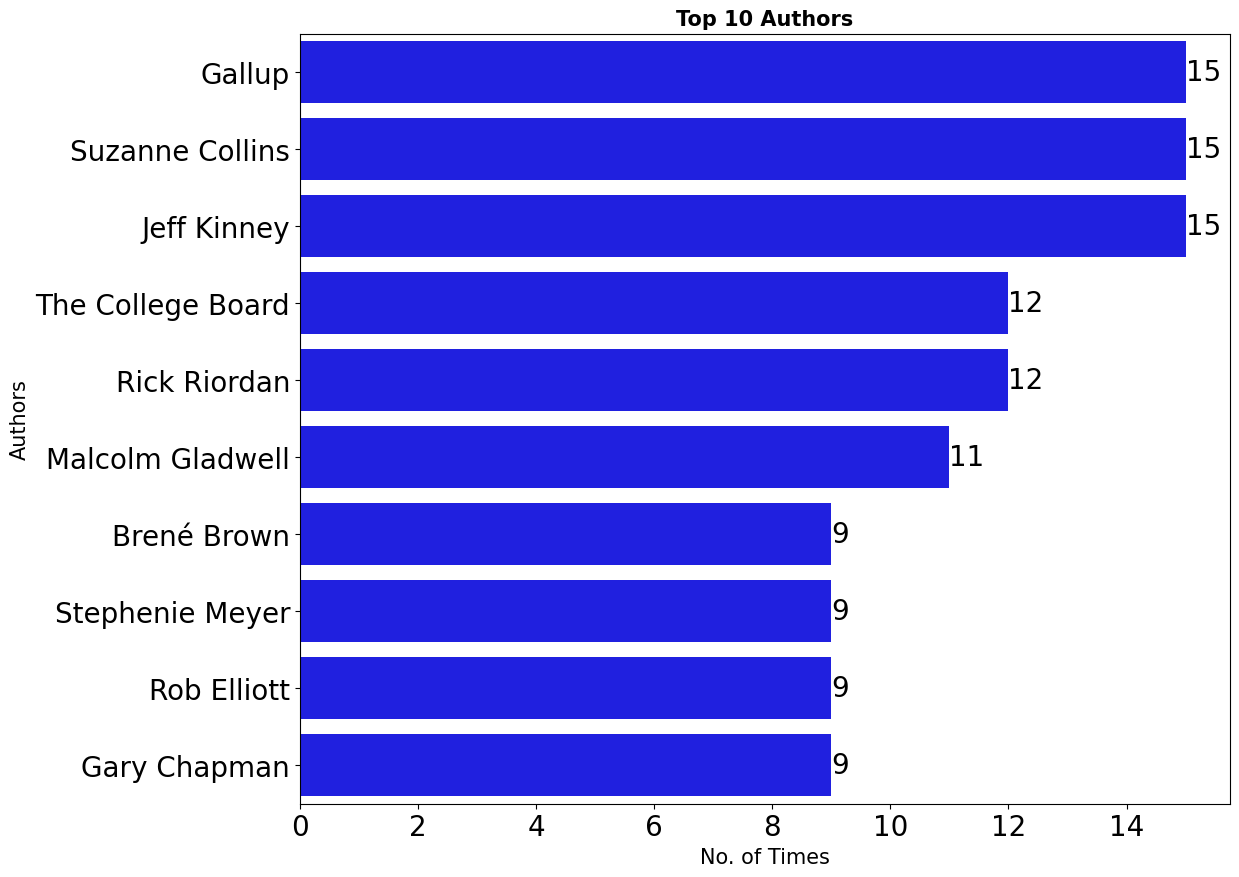

In [177]:
# Top 10 authors based on number of times their books appeared from 2009 to 2019
plt.figure(figsize=[12, 10])
ax = sns.barplot(
    data = amazon_book.author.value_counts().head(10).reset_index(),
    y = 'index',
    x = 'author',
    color='b'
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('No. of Times', fontsize=15)
plt.ylabel('Authors', fontsize=15)

plt.title("Top 10 Authors", weight='bold', fontsize = 15)
plt.show()

Gallup, Suzanne Collins, Jeff Kinney are the top authors based on number of times their books appeared from 2009 to 2019

#### Top 10 best selling Book from 2009 to 2019

In [179]:
# Top 10 best selling Book from 2009 to 2019
pd.DataFrame(amazon_book.title.value_counts())[:10]

,title
StrengthsFinder 2.0,11
The Official SAT Study Guide,9
The Gifts of Imperfection: Let Go of Who You Think You're Supposed to Be and Embrace Who You Are,7
The Great Gatsby: The Only Authorized Edition,7
"Oh, the Places You'll Go!",7
"Publication Manual of the American Psychological Association, 6th Edition",7
What to Expect When You're Expecting,7
"The Care and Keeping of You: The Body Book for Younger Girls, Revised Edition (American Girl Library)",7
"Unbroken: A World War II Story of Survival, Resilience, and Redemption",6
"Jesus Calling, Padded Hardcover, with Scripture References: Enjoying Peace in His Presence (A 365-Day Devotional)",6


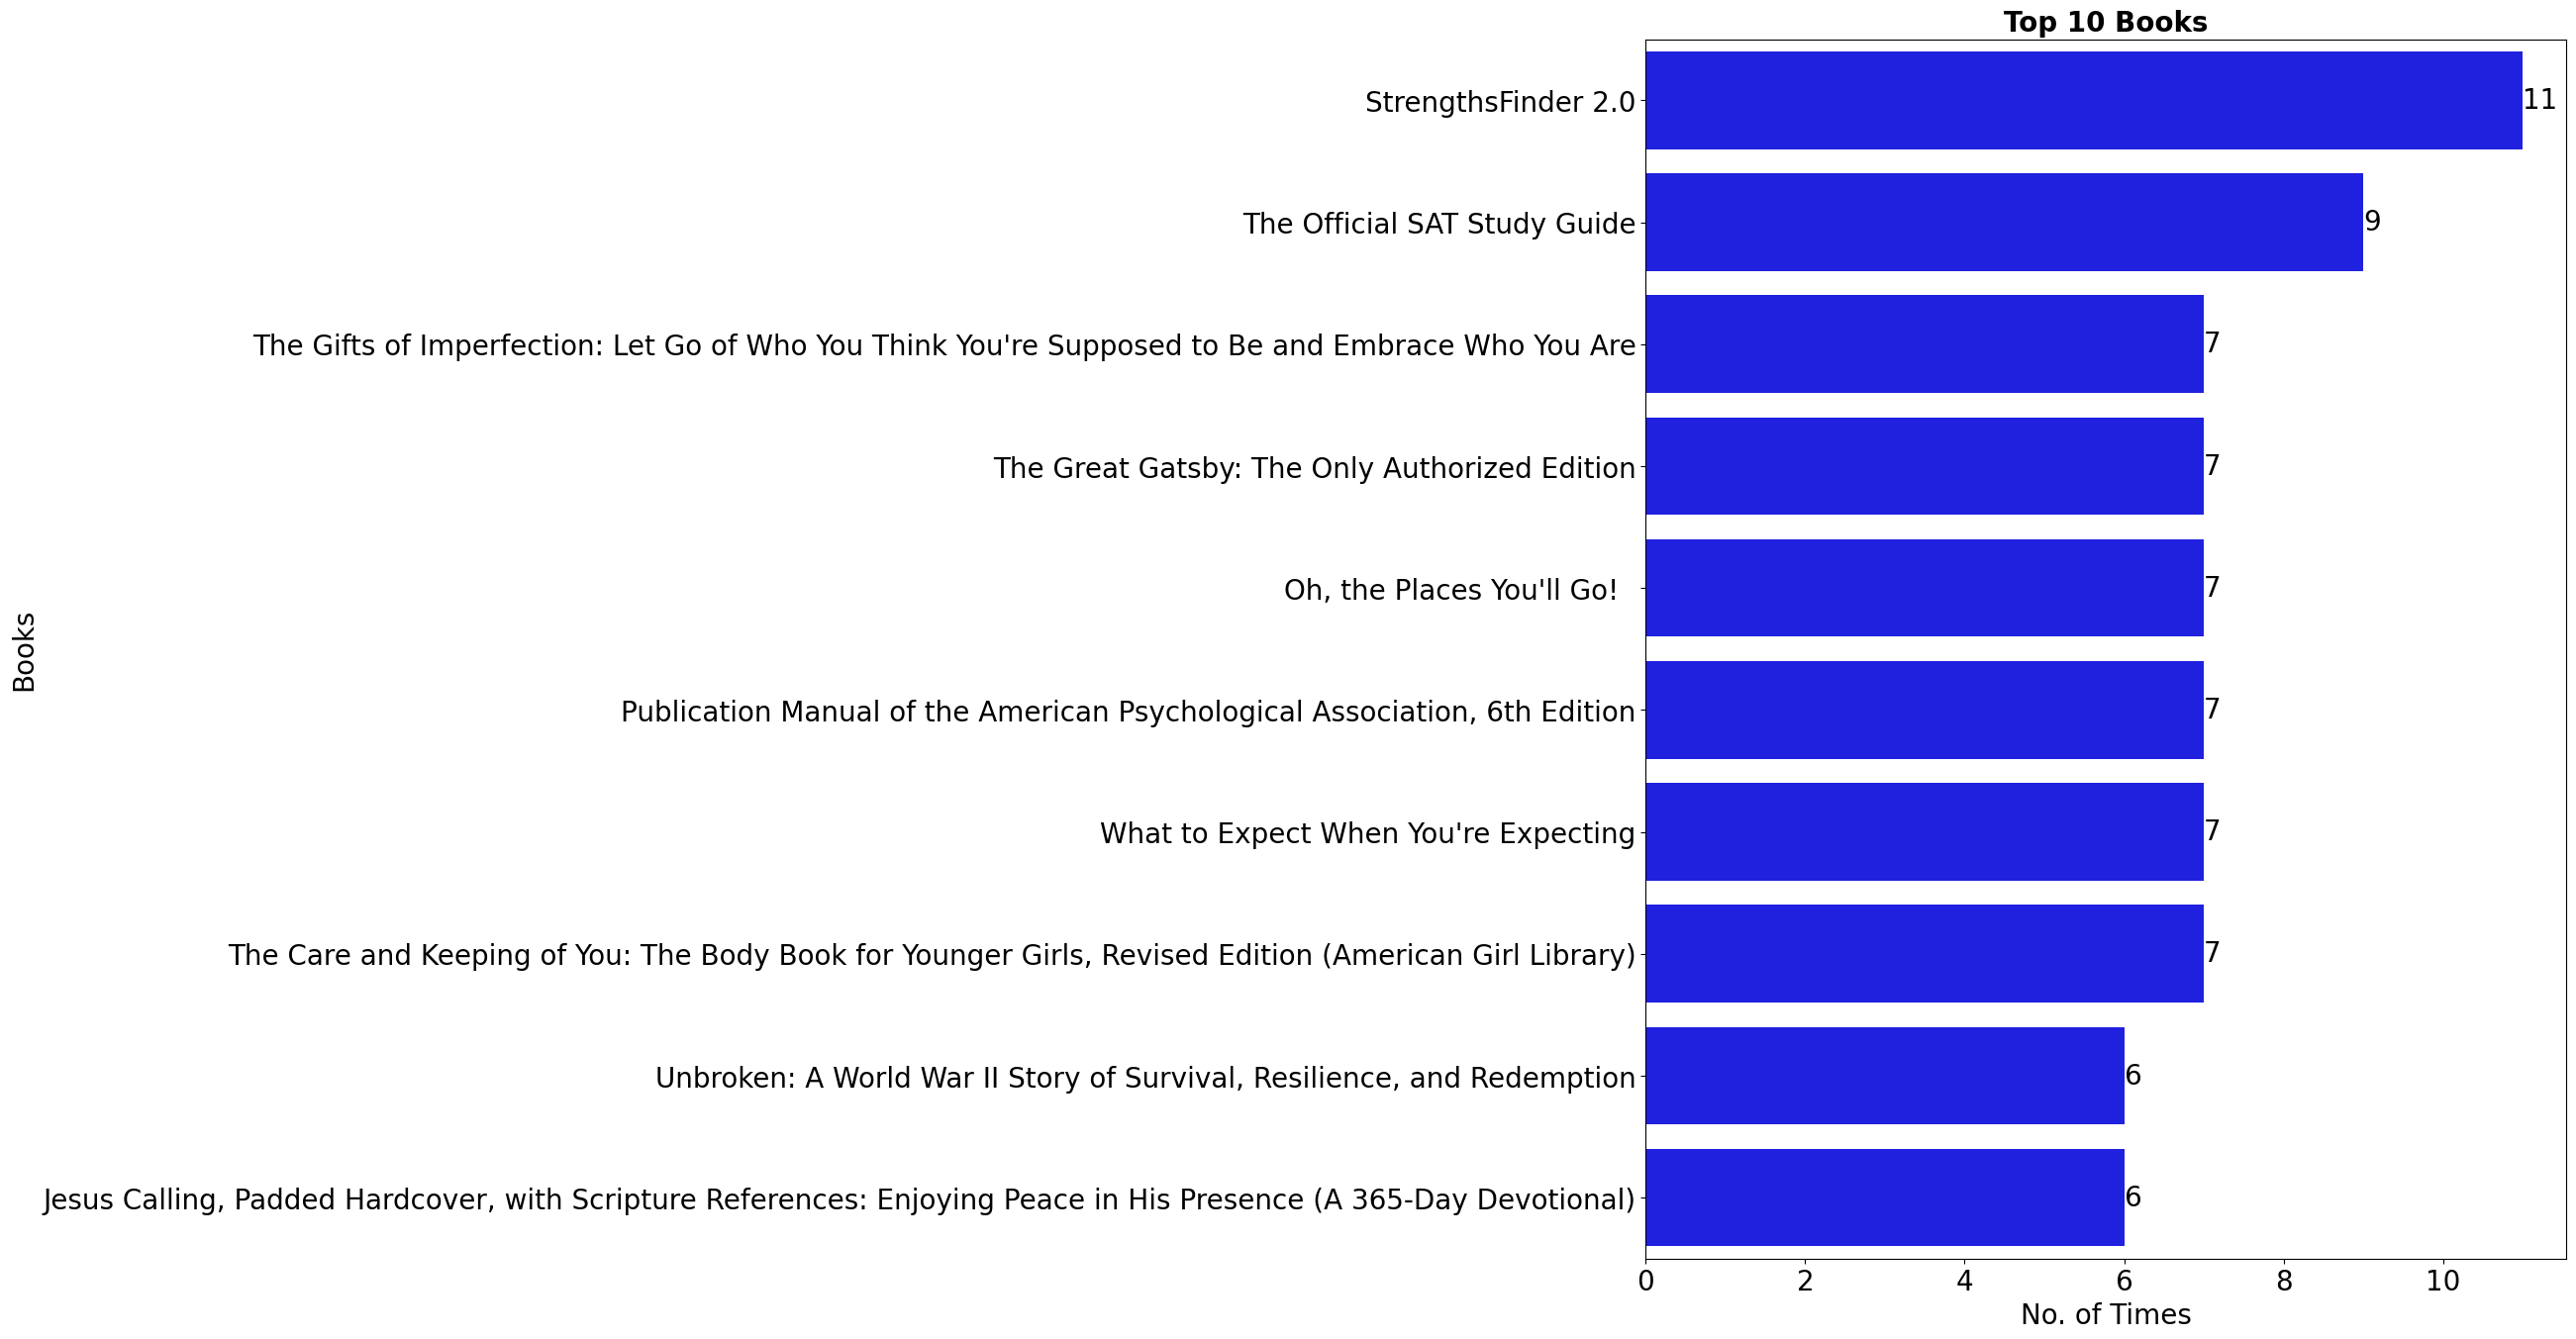

In [180]:
# visual showing Top 10 best selling Book from 2009 to 2019
plt.rcParams['figure.figsize'] = (12, 16)

plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

ax = sns.barplot(
    data = amazon_book.title.value_counts().reset_index()[:10],
    y = 'index',
    x = 'title',
    color='b'
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('No. of Times', fontsize=20)
plt.ylabel('Books', fontsize=20)

plt.title("Top 10 Books", weight='bold', fontsize=20)
plt.show()

StrengthsFinder 2.0 is the top best selling book, followed by The Official SAT Study Guide, The Gifts of Imperfection: Let Go of Who You Think You're Supposed to Be and Embrace Who You Are

### Top 10 Authors with the Highest Reviews

In [171]:
authorvsreviews = pd.DataFrame(amazon_book.groupby('author')['total_reviews'].sum().sort_values(ascending=False).reset_index())[:10]
authorvsreviews

,author,total_reviews
0,Delia Owens,1301999
1,Paula Hawkins,984170
2,Suzanne Collins,921570
3,Harper Lee,643836
4,Dale Carnegie,638789
5,Don Miguel Ruiz,626641
6,Paulo Coelho,623435
7,John Green,582234
8,E L James,572711
9,Dungeons & Dragons,491604


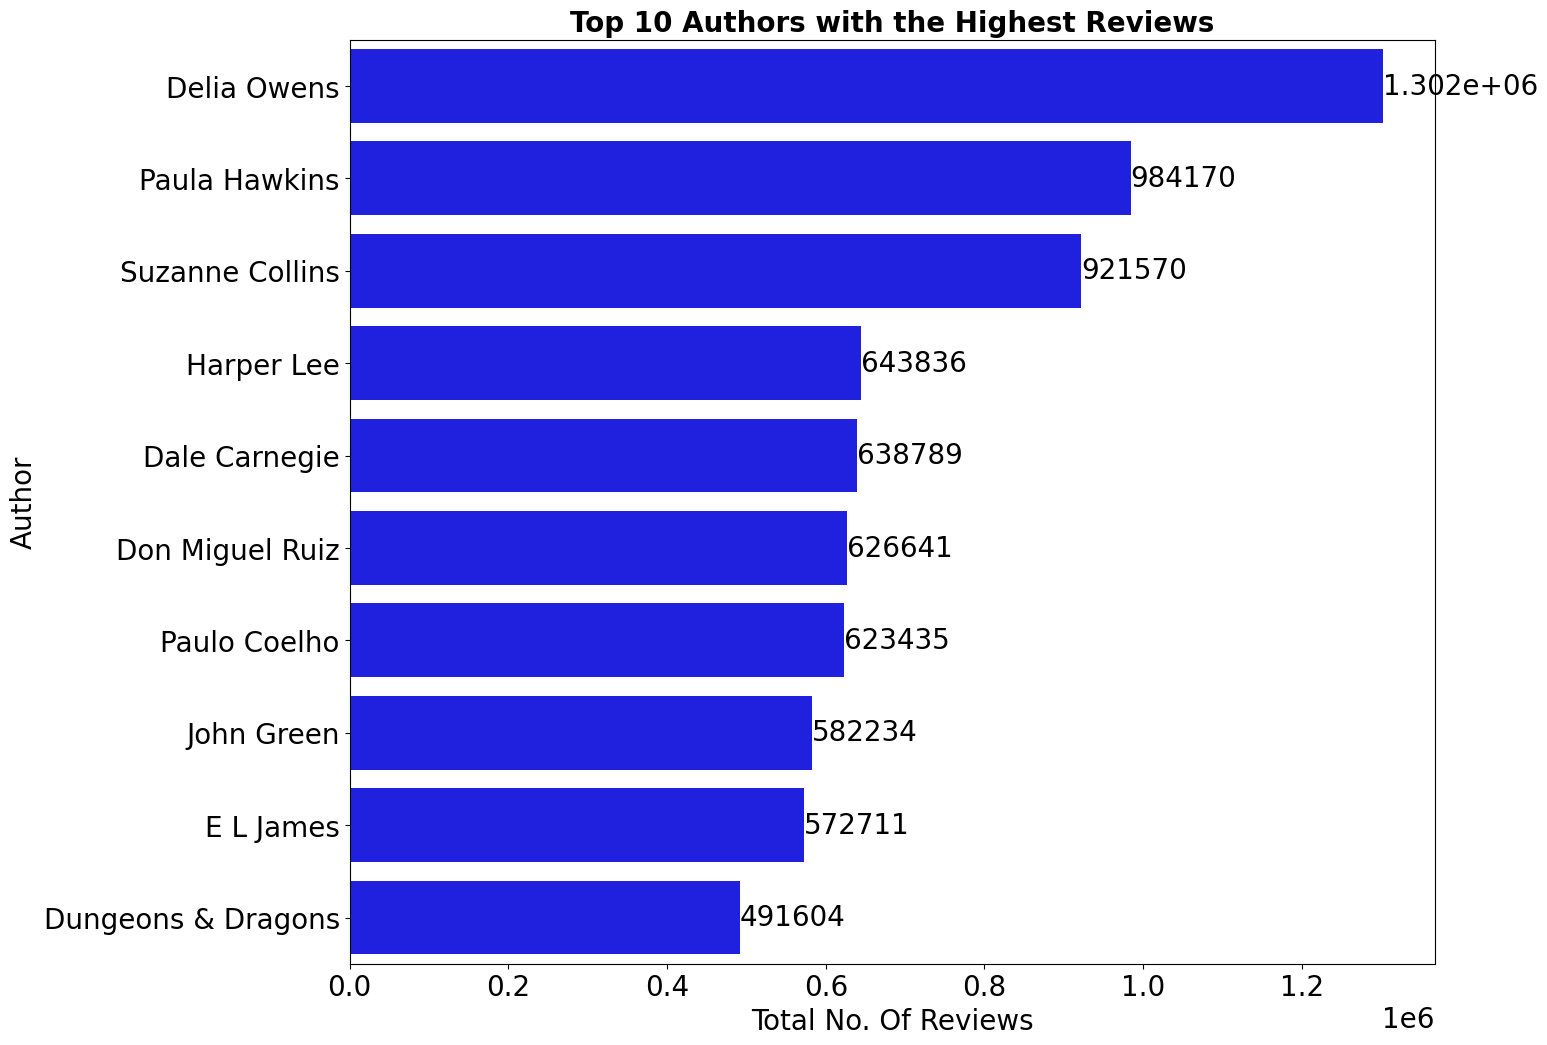

In [175]:
# visualizing the top 10 authors based on reviews
plt.rcParams['figure.figsize'] = (14, 12)

#set label sizes for axes, xtick and ytick
plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

ax = sns.barplot(
    data = amazon_book.groupby('author')['total_reviews'].sum().sort_values(ascending=False).reset_index()[:10],
    y = 'author',
    x = 'total_reviews',
    color='b'
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Total No. Of Reviews', fontsize=20)
plt.ylabel('Author', fontsize=20)

plt.title("Top 10 Authors with the Highest Reviews", weight='bold', fontsize=20)
plt.show()

From the above chart we see that Delia Owens	has the highest review with 1,301,999 followed by Paula Hawkins	with 984,170 reviews and Suzanne Collins with  	921,570 review

### Top 10 Authos and Book with the Highest Reviews

In [189]:
review_with_author = pd.DataFrame(amazon_book.groupby(['author', 'title'])['total_reviews'].sum().sort_values(ascending=False).iloc[:10].reset_index())
review_with_author

,author,title,total_reviews
0,Delia Owens,Where the Crawdads Sing,1301999
1,Paula Hawkins,The Girl on the Train,984170
2,Don Miguel Ruiz,The Four Agreements: A Practical Guide to Pers...,626641
3,Paulo Coelho,"The Alchemist, 25th Anniversary: A Fable About...",611987
4,Harper Lee,To Kill a Mockingbird,591390
5,Dale Carnegie,How to Win Friends & Influence People (Dale Ca...,559695
6,John Green,The Fault in Our Stars,480087
7,Laura Hillenbrand,"Unbroken: A World War II Story of Survival, Re...",452622
8,Anthony Doerr,All the Light We Cannot See,430546
9,Gary Chapman,The 5 Love Languages: The Secret to Love that ...,428730


From this above table we can see the authors that has the highest review and the title of thier books.

### Number of books by cover type

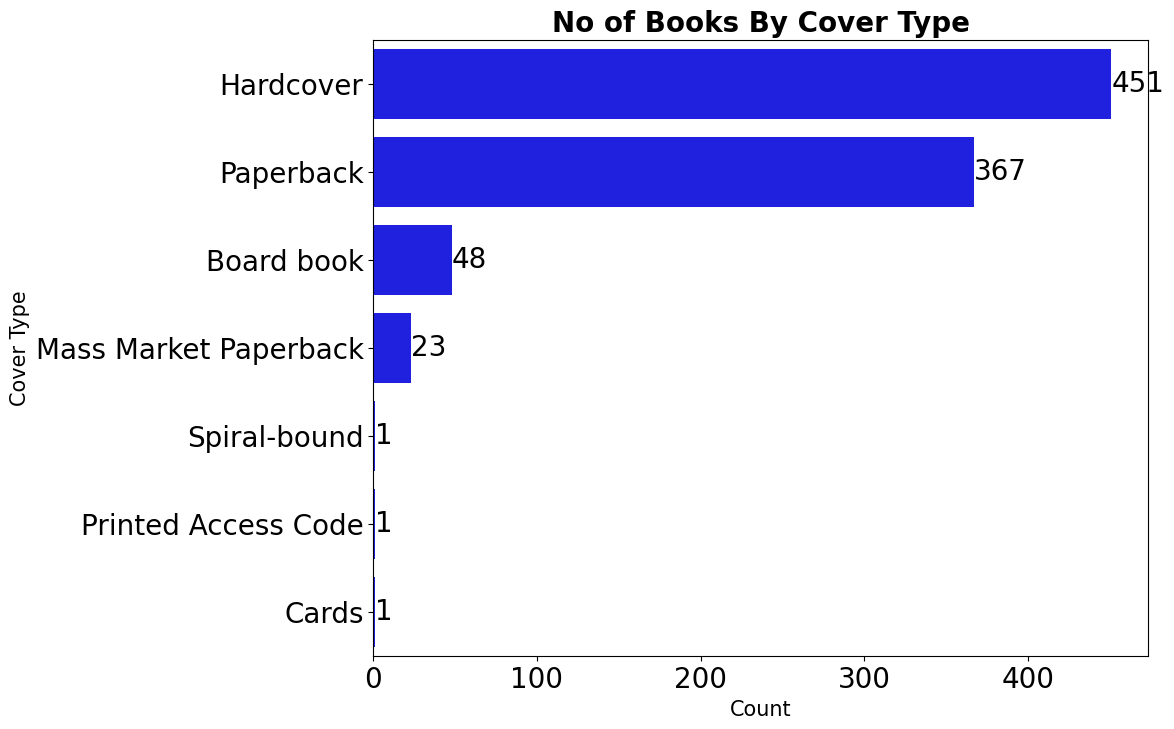

In [137]:
# Visualizing number of book by cover type
plt.figure(figsize=[10, 8])
ax = sns.barplot(
    data = amazon_book.cover_type.value_counts().head(10).reset_index(),
    y = 'index',
    x = 'cover_type',
    color='b'
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Count', fontsize=15)
plt.ylabel('Cover Type', fontsize=15)

plt.title("No of Books By Cover Type", weight='bold', fontsize = 20)
plt.show()

The above chart indicated that Hardcover has the highest number of book with 451 followed by paperback 367 and boardbook with 48

#### Book by Top Average price

In [191]:
author_and_price = pd.DataFrame(amazon_book.groupby(['author', 'title'])['price'].mean().sort_values(ascending=False).iloc[:10].reset_index())
author_and_price

,author,title,price
0,American Psychiatric Association,Diagnostic and Statistical Manual of Mental Di...,93.49
1,Hall H Pearson Education,MyMathLab: Student Access Kit,75.49
2,The College Board,The Official SAT Study Guide: For the New SAT ...,71.93
3,Charlaine Harris,Sookie Stackhouse,59.99
4,Veronica Roth,Divergent / Insurgent / Allegiant,58.68
5,Stephenie Meyer,The Twilight Saga Collection,58.00
6,ACT,The Real ACT Prep Guide,57.97
7,Stephanie Milton,Minecraft: The Complete Handbook Collection,52.99
8,Kelly Starrett,"Becoming a Supple Leopard: Movement, Mobility,...",50.41
9,Jay-Z,Decoded,44.99


#### Top rated Books from 2009 to 2019

In [205]:
topratedbooks= amazon_book.groupby('title')['ratings'].mean().sort_values(ascending=False).reset_index()[:10]
topratedbooks

,title,ratings
0,The Food Lab: Better Home Cooking Through Science,4.9
1,"Oh, the Places You'll Go!",4.9
2,Last Week Tonight with John Oliver Presents: A...,4.9
3,Chicka Chicka Boom Boom (Board Book),4.9
4,Strange Planet (Strange Planet Series),4.9
5,Little Blue Truck,4.9
6,"Goodnight, Goodnight Construction Site (Hardco...",4.9
7,Goodnight Moon,4.9
8,The Wonderful Things You Will Be,4.9
9,Little Blue Truck board book,4.9


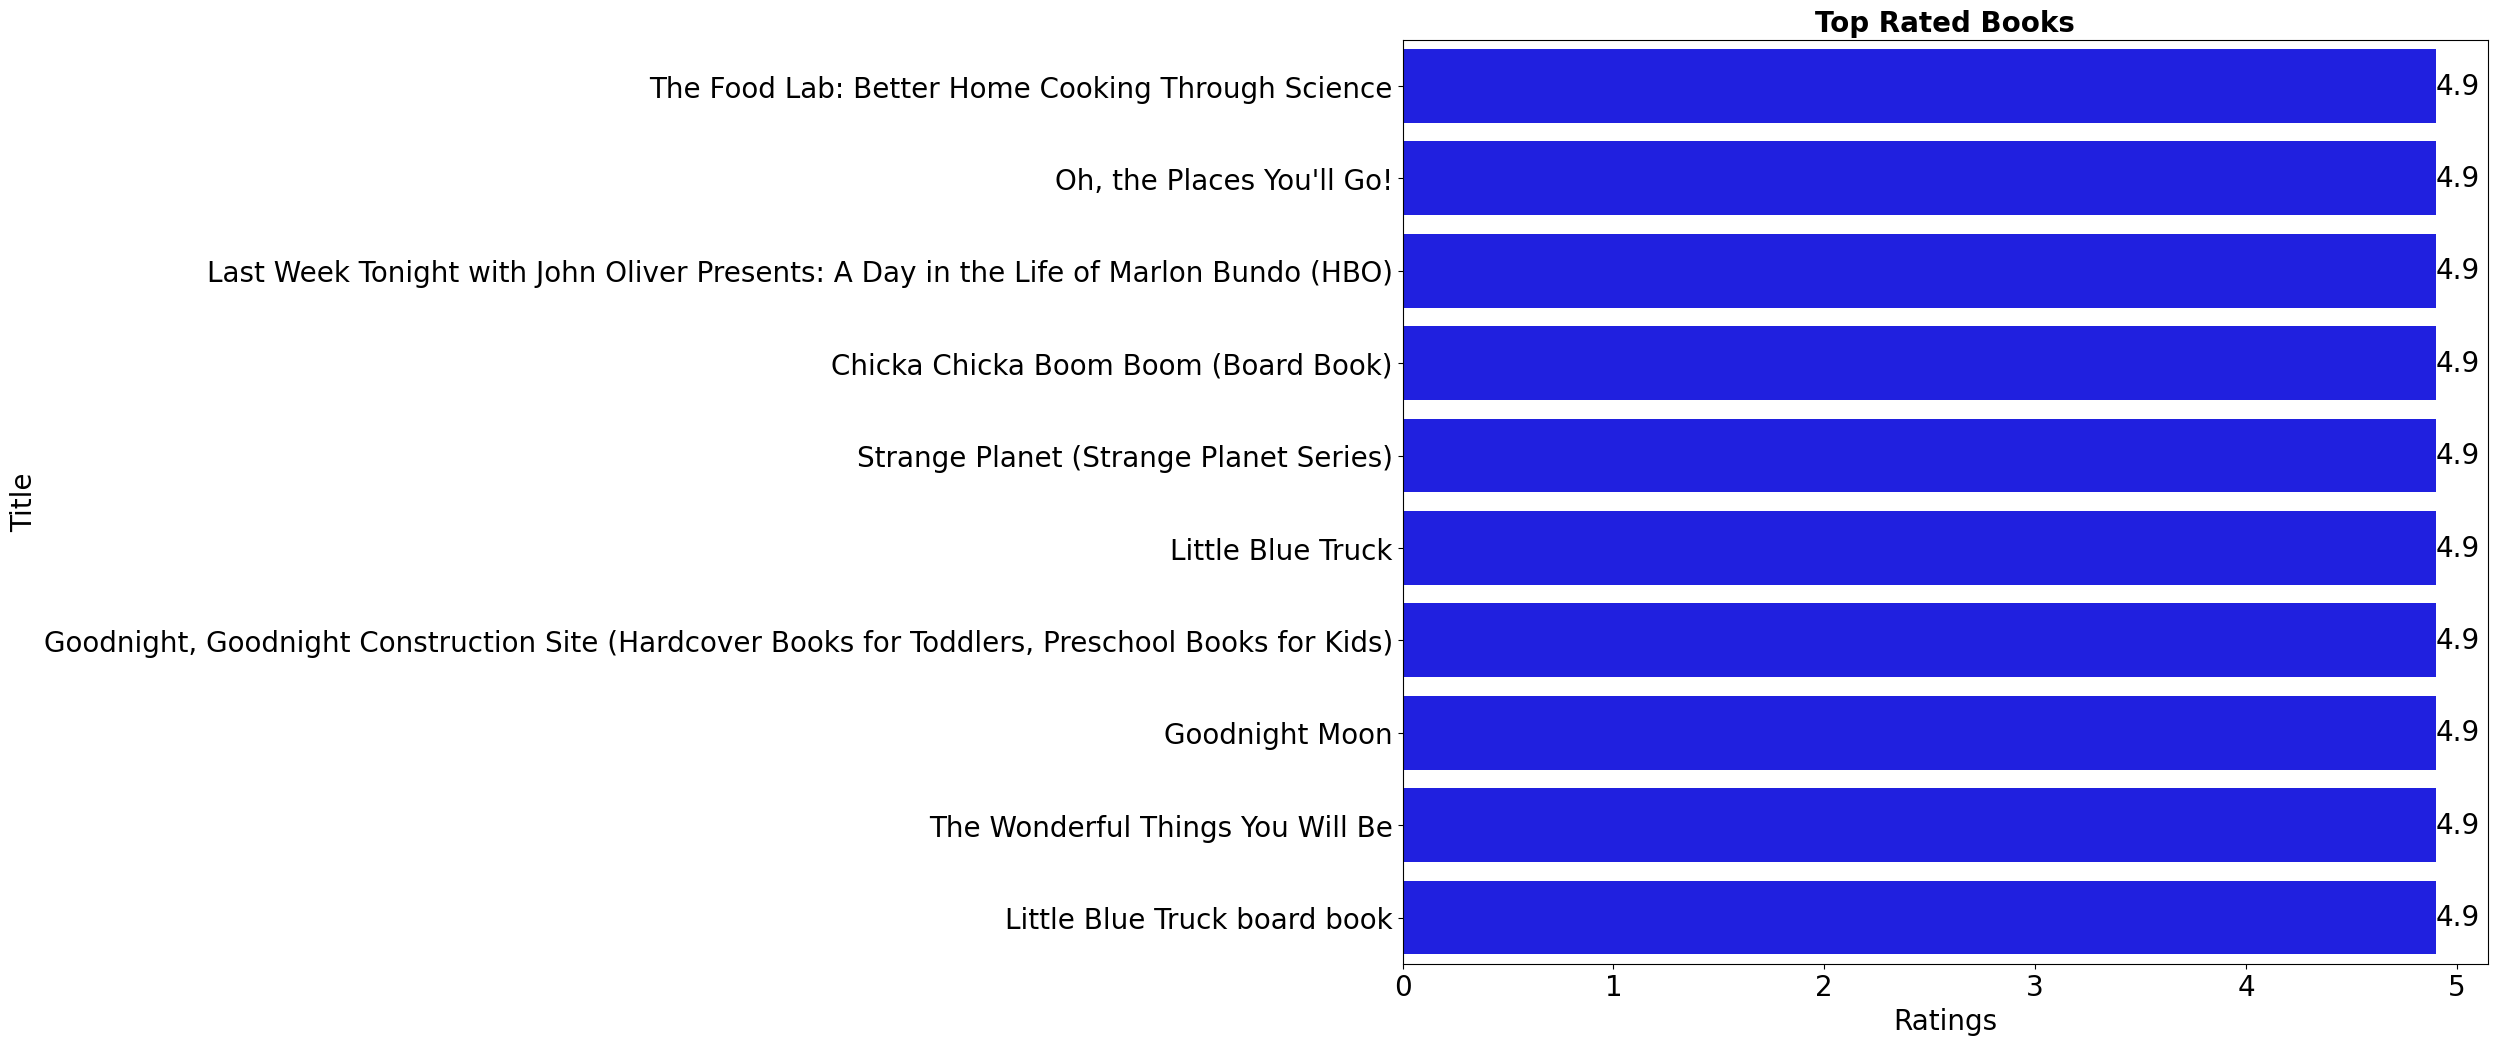

In [197]:
# visualizing the top 10 authors based on reviews
plt.rcParams['figure.figsize'] = (14, 12)

#set label sizes for axes, xtick and ytick
plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

ax = sns.barplot(
    data = amazon_book.groupby('title')['ratings'].mean().sort_values(ascending=False).reset_index()[:10],
    y = 'title',
    x = 'ratings',
    color='b'
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Ratings', fontsize=20)
plt.ylabel('Title', fontsize=20)

plt.title("Top Rated Books", weight='bold', fontsize=20)
plt.show()

The above chart shows top rated book with ratings of 4.9

### Top rated Authors

In [206]:
topratedsuthors= amazon_book.groupby(['author'])['ratings'].mean().sort_values(ascending=False).reset_index()[:10]
topratedsuthors

,author,ratings
0,Patrick Thorpe,4.9
1,Rush Limbaugh,4.9
2,J. Kenji López-Alt,4.9
3,Shel Silverstein,4.9
4,Dr. Seuss,4.9
5,Margaret Wise Brown,4.9
6,Sherri Duskey Rinker,4.9
7,Andrea Beaty,4.9
8,Robert Munsch,4.9
9,Emily Winfield Martin,4.9


#### Top rated books along side their authors

In [193]:
author_and_rating= pd.DataFrame(amazon_book.groupby(['author', 'title'])['ratings'].mean().sort_values(ascending=False).iloc[:10].reset_index())
author_and_rating

,author,title,ratings
0,Dungeons & Dragons,Xanathar's Guide to Everything (Dungeons & Dra...,4.9
1,Eric Carle,The Very Hungry Caterpillar,4.9
2,Emily Winfield Martin,The Wonderful Things You Will Be,4.9
3,J. Kenji López-Alt,The Food Lab: Better Home Cooking Through Science,4.9
4,J.K. Rowling,Harry Potter and the Sorcerer's Stone: The Ill...,4.9
5,Patrick Thorpe,The Legend of Zelda: Hyrule Historia,4.9
6,Bill Martin Jr.,"Brown Bear, Brown Bear, What Do You See?",4.9
7,Bill Martin Jr.,Chicka Chicka Boom Boom (Board Book),4.9
8,Dungeons & Dragons,Love You Forever,4.9
9,Dungeons & Dragons,D&D Player’s Handbook (Dungeons & Dragons Core...,4.9


### Checking for relationship between rating and price

In [199]:
amazon_book.corr(method = 'pearson')

,price,rank,total_reviews,ratings,year
price,1.000000,0.064825,-0.067669,-0.070836,-0.201352
rank,0.064825,1.000000,-0.214581,0.022895,-0.011153
total_reviews,-0.067669,-0.214581,1.000000,0.002716,0.254273
ratings,-0.070836,0.022895,0.002716,1.000000,0.252953
year,-0.201352,-0.011153,0.254273,0.252953,1.000000


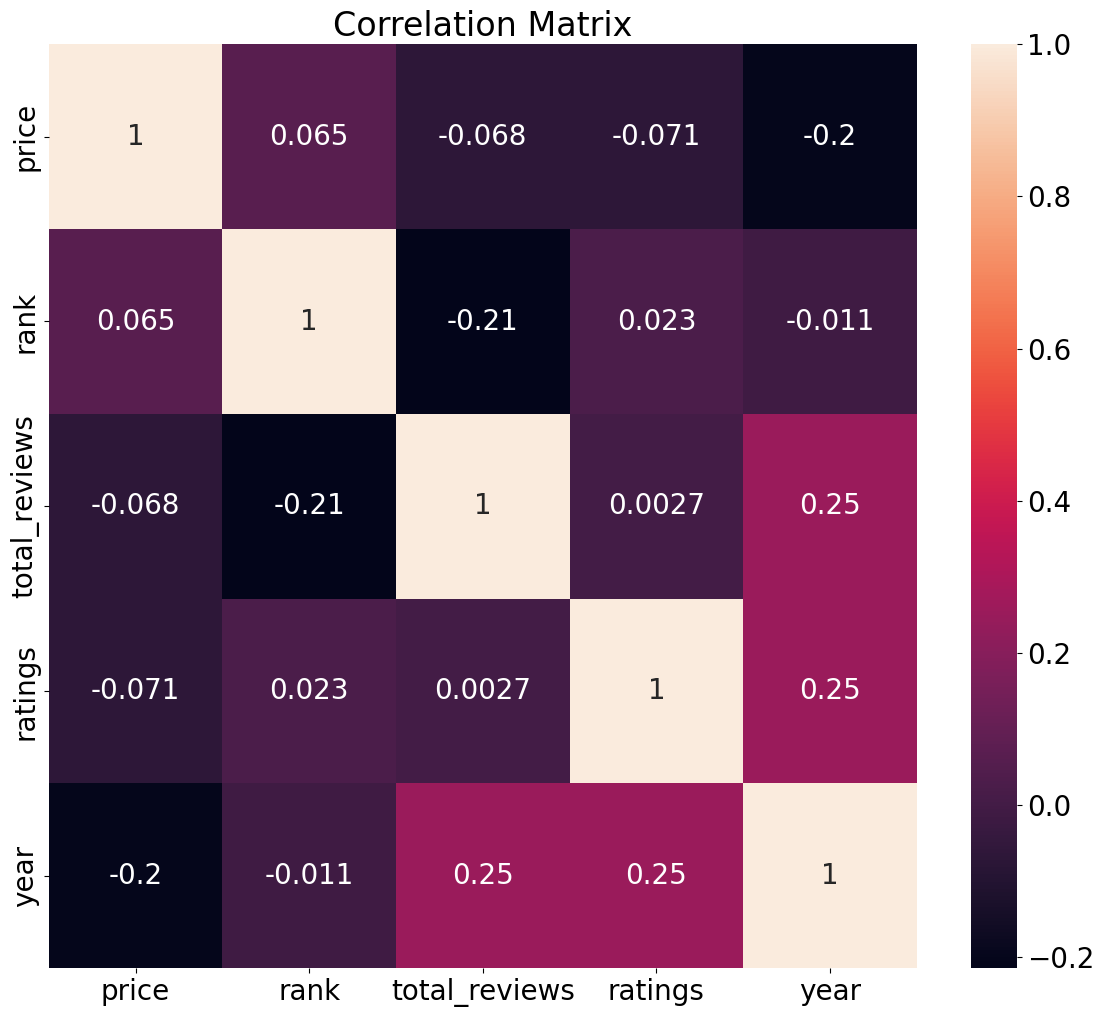

In [200]:
corelation_matrix = amazon_book.corr(method = 'pearson')
sns.heatmap(corelation_matrix, annot = True)
plt.title ('Correlation Matrix')
plt.show()

There is no relationship between rating and price

## Conclusion

- Gallup, Suzanne Collins, Jeff Kinney are the top authors based on number of times their books appeared from 2009 to 2019


- StrengthsFinder 2.0 is the top best selling book, followed by The Official SAT Study Guide, The Gifts of Imperfection: Let Go of Who You Think You're Supposed to Be and Embrace Who You Are


- Delia Owens has the highest review with 1,301,999 followed by Paula Hawkins with 984,170 reviews and Suzanne Collins with 921,570 review


- Hardcover has the highest number of book with 451 followed by paperback 367 and boardbook with 48


- There is no relationship between rating and price